In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("./sea_turtle.csv")

In [5]:
df.describe()

,Temp,Sex,Treat
count,741.000000,741.000000,741.000000
mean,29.740592,0.572200,29.678812
std,1.532020,0.495094,1.504748
min,26.660389,0.000000,27.000000
25%,28.572000,0.000000,29.000000
50%,29.305000,1.000000,29.000000
75%,31.050000,1.000000,31.000000
max,32.600000,1.000000,33.000000


In [6]:
df.head()

,ID,Population,Species,Temp,Sex,Mother,Box,Treat
0,LI1C,LI,cm,29.036,0,LIC,LI1,29
1,LI1E,LI,cm,29.036,0,LIE,LI1,29
2,LI1B,LI,cm,29.036,1,LIB,LI1,29
3,LI1D,LI,cm,29.036,0,LID,LI1,29
4,LI1I,LI,cm,29.036,1,LII,LI1,29


In [8]:
temp=df["Temp"].values
sex=df["Sex"].values

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()# modelを作って
model.fit(temp.reshape(-1,1),sex)# fitする
#fit()には、(n行1列)の行列を入れる
print("coefficient:",model.coef_) # coeficient  y=ax+bのa
print("intercept:",model.intercept_) #intercept, 切片
print("correct rate:",model.score(temp.reshape(-1,1),sex))
# score()で予測の良さを返します。logisticRegression()のモデルでは正答率です。
predicted=model.predict([[20],[30],[31],[35],[40]])
# predict()で性別の予測値を返します
y=model.predict_proba(np.arange(20,40).reshape(-1,1))
# predict_proba()で割合の予測値を返します

coefficient: [[-0.29210731]]
intercept: [8.93852677]
correct rate: 0.805668016194332


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 0, 'temprature')

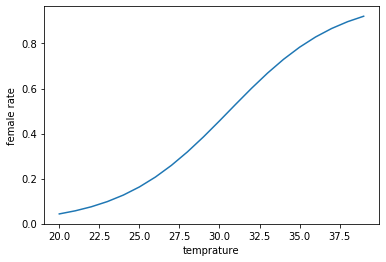

In [38]:
plt.plot(np.arange(20,40),y[:,0])
plt.ylabel("female rate")
plt.xlabel("temprature")